<a href="https://colab.research.google.com/github/hmada179/MNIST-DeepLearning-Project/blob/main/MNIST_DeepLearning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Activation, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

In [167]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [168]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [169]:
class_names = [*range(0, 10)]

Text(0.5, 1.0, '9')

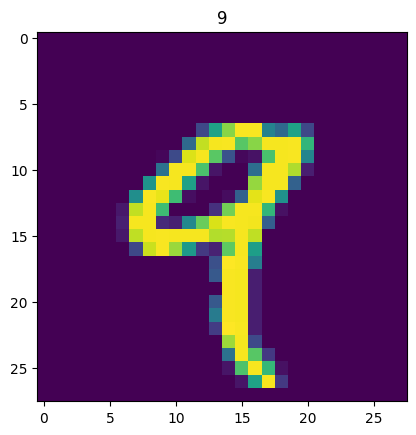

In [170]:
plt.imshow(x_train[4])
plt.title(class_names[y_train[4]])

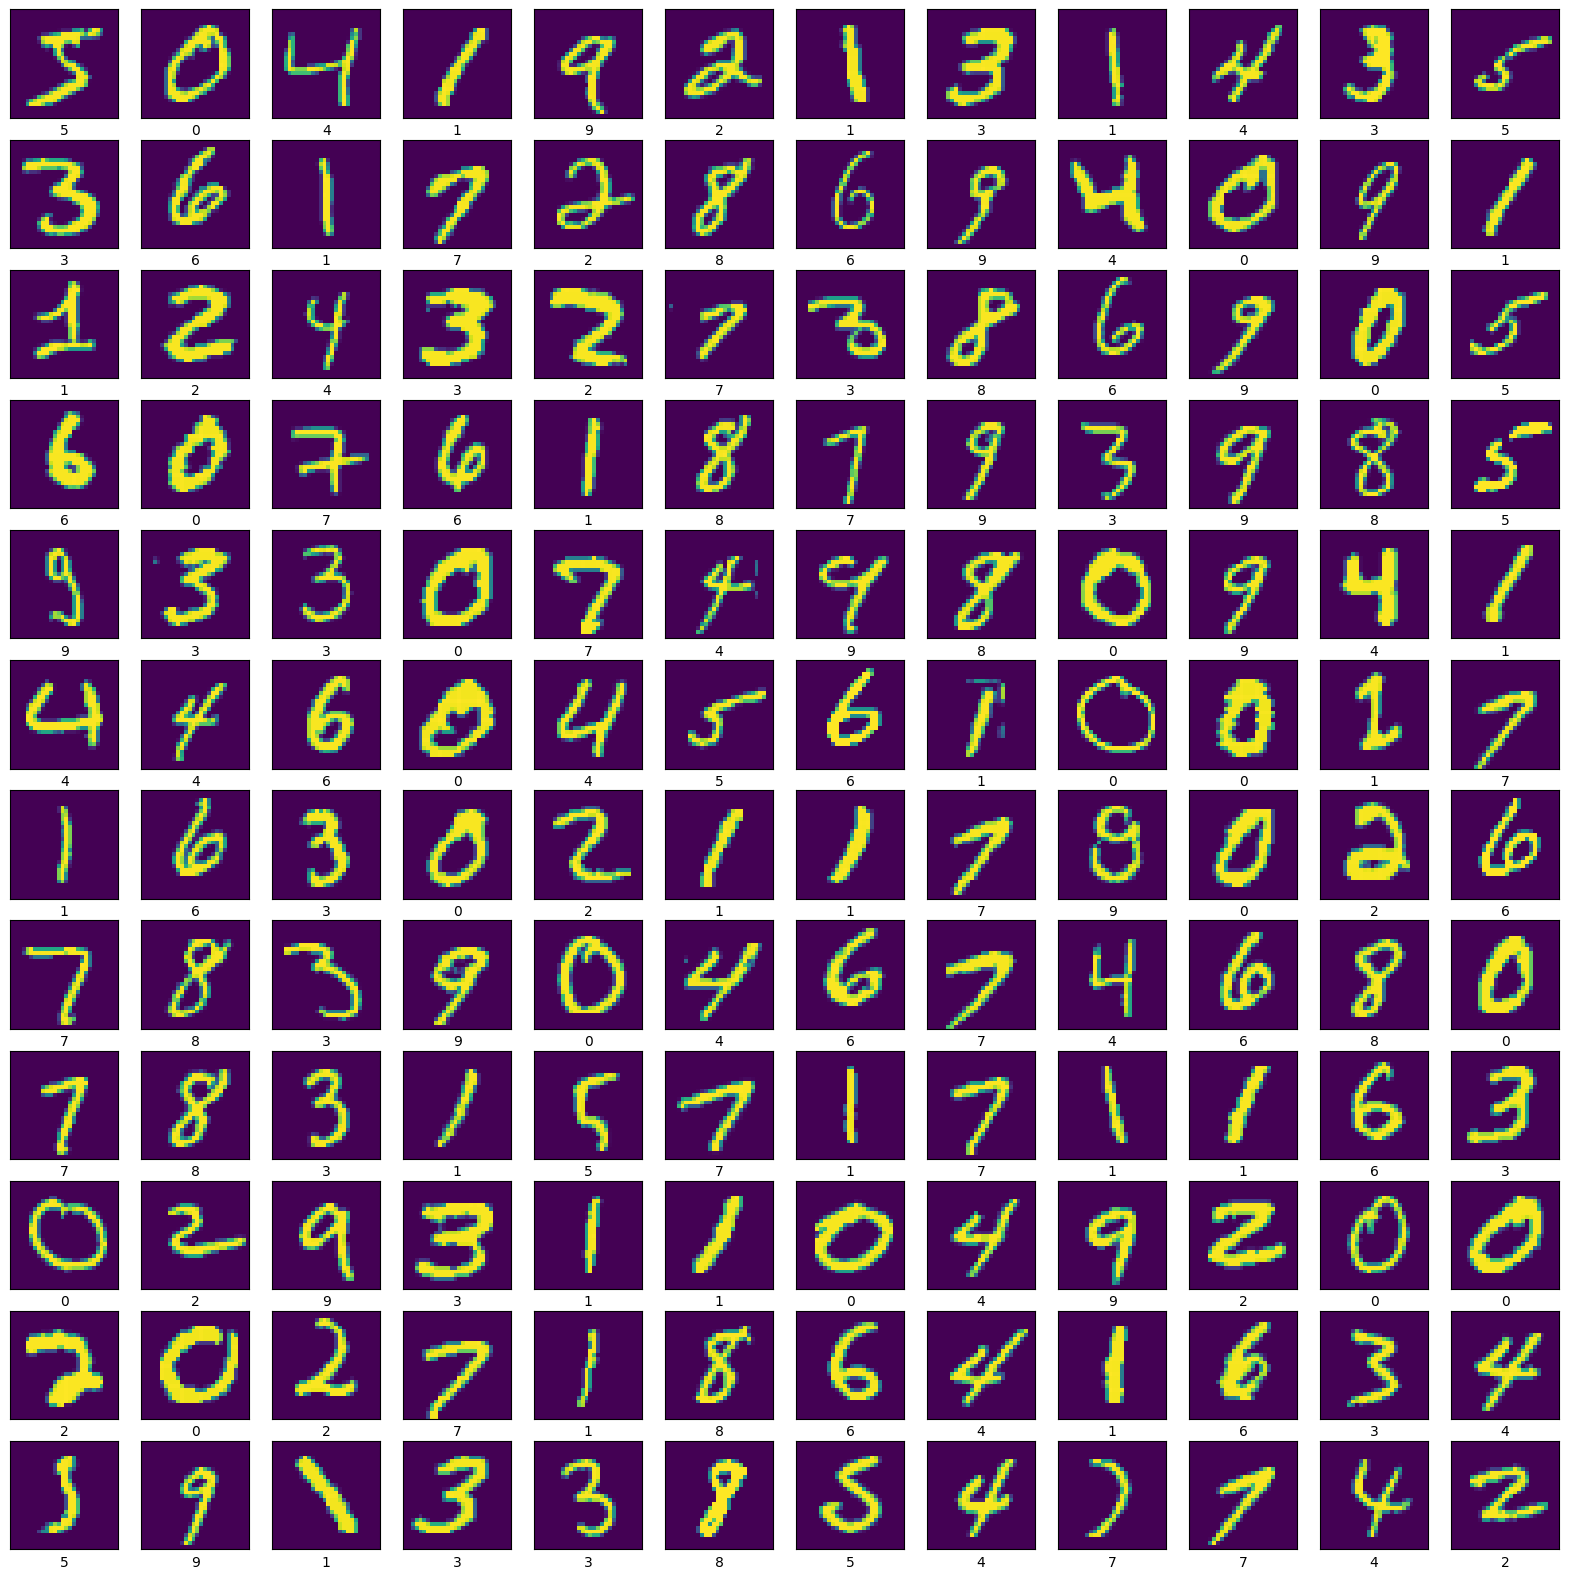

In [171]:
plt.figure(figsize=(20,20))
for i in range(144):
    plt.subplot(12,12,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('white')
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [172]:
y_train = y_train.flatten()
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [173]:
data = pd.DataFrame(y_train)
data

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [174]:
data.value_counts()

,count
0,
1,6742
7,6265
3,6131
2,5958
9,5949
0,5923
6,5918
8,5851
4,5842


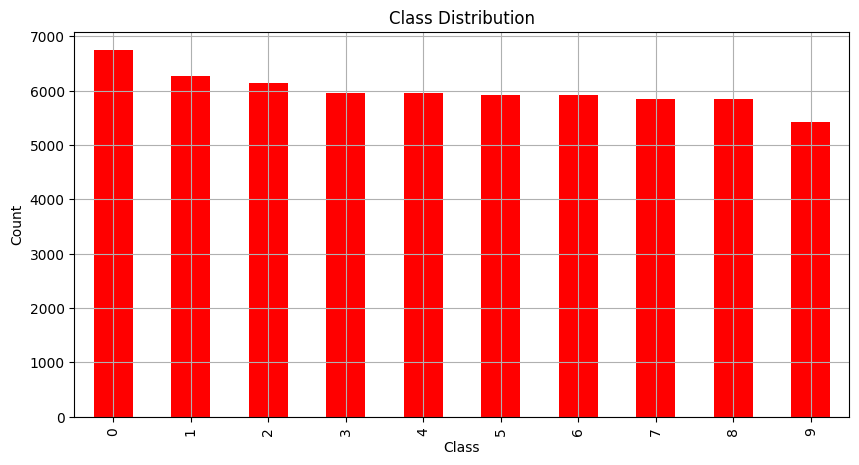

In [175]:
plt.figure(figsize=(10,5))
data.value_counts().plot(kind='bar', color='red')
plt.title('Class Distribution')
plt.xticks(np.arange(10), class_names)
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [176]:
x_train.shape

(60000, 28, 28)

In [177]:
# normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [178]:
model=Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [179]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [180]:
history=model.fit(x_train, y_train, epochs=15, validation_data= (x_test,y_test), batch_size= 200)

Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8729 - loss: 0.4163 - val_accuracy: 0.9697 - val_loss: 0.1017
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9759 - loss: 0.0787 - val_accuracy: 0.9774 - val_loss: 0.0732
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.9859 - loss: 0.0446 - val_accuracy: 0.9772 - val_loss: 0.0720
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9895 - loss: 0.0304 - val_accuracy: 0.9785 - val_loss: 0.0713
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9920 - loss: 0.0234 - val_accuracy: 0.9762 - val_loss: 0.0916
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.9923 - loss: 0.0229 - val_accuracy: 0.9787 - val_loss: 0.0813
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.9946 - loss: 0.0167 - val_accuracy: 0.9806 - val_loss: 0.0726
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9954 - loss: 0.0133 - 

In [181]:
print(history.history['accuracy'].index(max(history.history['accuracy'])))
print(max(history.history['accuracy']))

14
0.997083306312561


In [182]:
y_pred= model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [183]:
y_pred

array([[1.1478019e-13, 1.4809215e-10, 1.9285975e-12, ..., 9.9999994e-01,
        3.2204152e-14, 1.2720421e-11],
       [1.6409867e-12, 1.9878765e-07, 9.9999970e-01, ..., 5.7841308e-13,
        8.2628911e-14, 5.3154675e-20],
       [4.6397497e-11, 9.9999994e-01, 7.3448168e-09, ..., 1.3473918e-10,
        6.4061989e-10, 1.3818120e-13],
       ...,
       [7.3700898e-13, 1.1152530e-11, 5.2313748e-12, ..., 5.9645231e-12,
        3.6841613e-11, 4.4219486e-10],
       [2.5404356e-21, 9.7429541e-19, 2.4600482e-22, ..., 4.2936051e-22,
        1.0684421e-12, 1.3851214e-20],
       [2.3649478e-11, 8.9138244e-14, 4.0670571e-15, ..., 4.0363709e-18,
        1.0349981e-10, 4.7193765e-13]], dtype=float32)

In [184]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Accuracy: 0.9836
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Axes: >

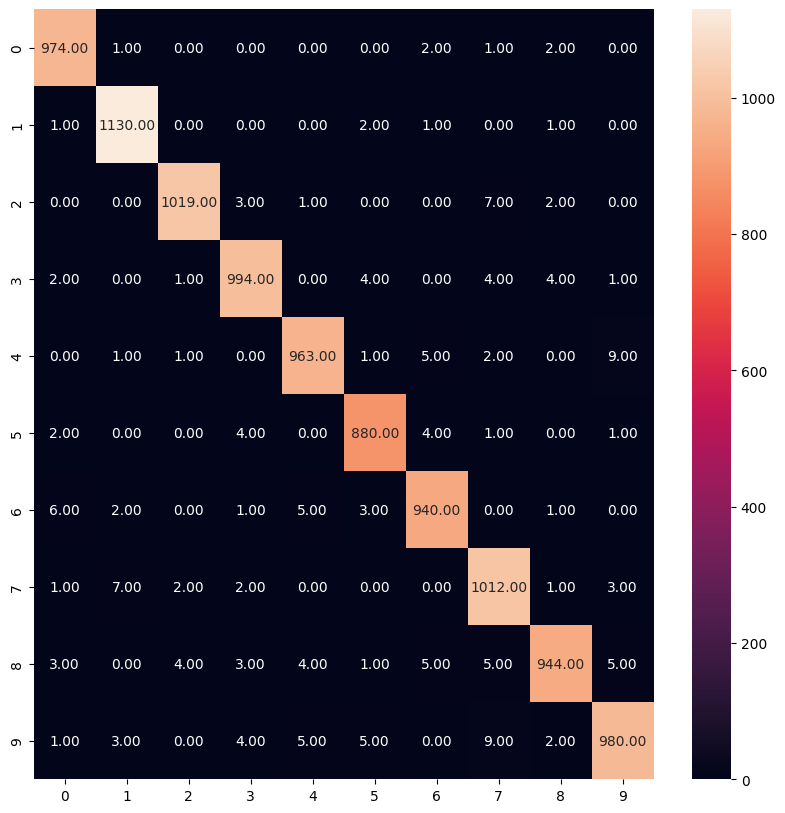

In [185]:
print(f"Accuracy: {accuracy_score(y_test,np.argmax(y_pred,axis=1))}")
print(classification_report(y_test,np.argmax(y_pred,axis=1)))
plt.figure(figsize= (10,10))
sns.heatmap(confusion_matrix(y_test, np.argmax(y_pred ,axis= 1)), annot= True, fmt= '.2f')

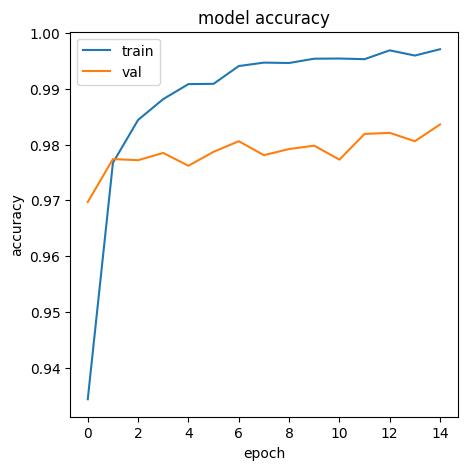

In [186]:
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

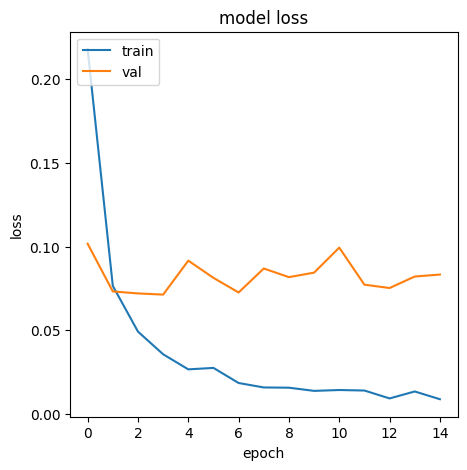

In [187]:
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')

In [188]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100 * np.max(predictions_array),
                                        class_names[int(true_label)]),  # Ensure true_label is an integer
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation=45)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[int(true_label)].set_color('blue')  # Ensure true_label is an integer


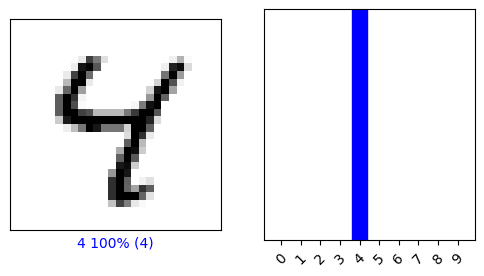

In [189]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_pred, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred, y_test)
plt.show()

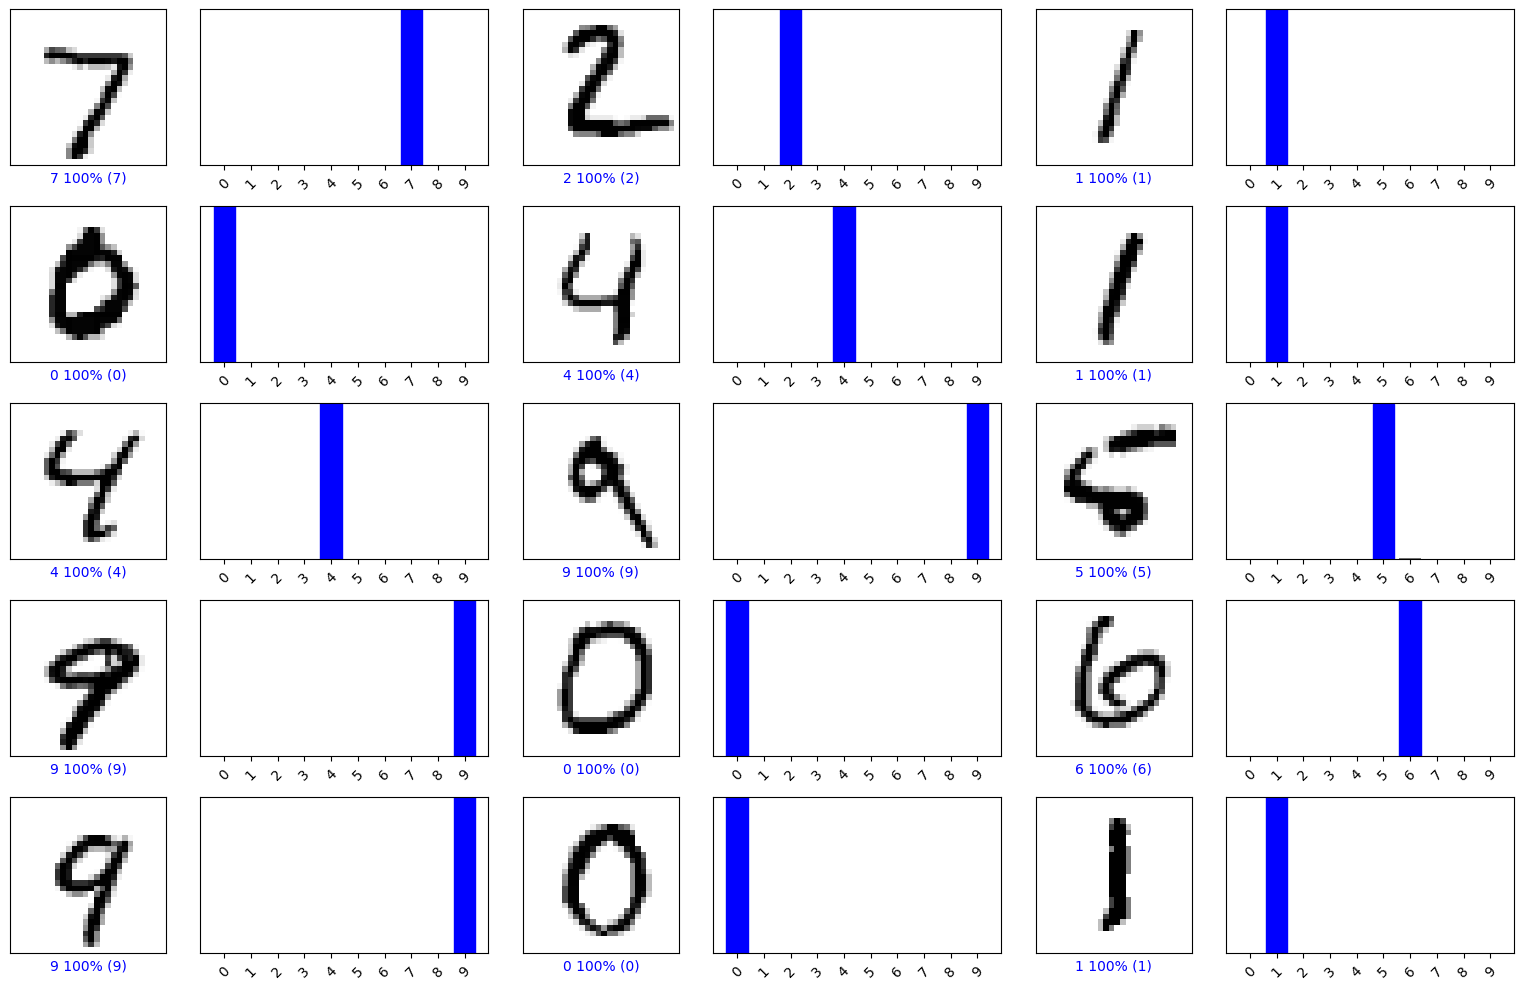

In [190]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*4, 2*5))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_pred, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_pred, y_test)
  plt.tight_layout()
plt.show()